In [2]:
import math
import pandas as pd
import quandl
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style=("ggplot")
df=quandl.get("WIKI/GOOGL")
df.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Ex-Dividend',
       u'Split Ratio', u'Adj. Open', u'Adj. High', u'Adj. Low', u'Adj. Close',
       u'Adj. Volume'],
      dtype='object')

In [3]:
import numpy as np
import pickle
temp=df

In [16]:
df.head()


,Adj. Close,hl_pct,pct_change,Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [17]:
########################################## high/low oercentage and percentage change ###########################################

df["hl_pct"]=(df["Adj. High"]-df["Adj. Low"])/df["Adj. Low"]*100.00
df["pct_change"]=(df["Adj. Close"]-df["Adj. Open"])/df["Adj. Open"]*100.00

KeyError: 'Adj. High'

In [18]:
df=df[["Adj. Close","hl_pct","pct_change","Volume"]]
df

,Adj. Close,hl_pct,pct_change,Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0
2004-08-26,54.122070,3.143512,2.820391,7094800.0
2004-08-27,53.239345,2.772258,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.517228,0.048866,4917800.0


In [19]:
###################################################### prediction of next 35 days ############################################

forecast_col="Adj. Close"
forecast_out=int(math.ceil(0.01*len(df)))
print forecast_out



df.fillna(-9999,inplace=True)
df["label"]=df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print df

34
             Adj. Close    hl_pct  pct_change      Volume        label
Date                                                                  
2004-08-19    50.322842  8.441017    0.324968  44659000.0    69.639972
2004-08-20    54.322689  8.537313    7.227007  22834300.0    69.078238
2004-08-23    54.869377  4.062357   -1.227880  18256100.0    67.839414
2004-08-24    52.597363  7.753210   -5.726357  15247300.0    68.912727
2004-08-25    53.164113  3.966115    1.183658   9188600.0    70.668146
2004-08-26    54.122070  3.143512    2.820391   7094800.0    71.219849
2004-08-27    53.239345  2.772258   -1.803885   6211700.0    72.278116
2004-08-30    51.162935  3.411430   -3.106003   5196700.0    74.810934
2004-08-31    51.343492  1.517228    0.048866   4917800.0    74.199045
2004-09-01    50.280210  3.310926   -2.385589   9138200.0    70.462511
2004-09-02    50.912161  3.466748    2.442224  15118600.0    74.921275
2004-09-03    50.159839  2.436569   -0.931154   5152400.0    86.481962
200

In [20]:
df[["label","Adj. Close"]]


,label,Adj. Close
Date,,
2004-08-19,69.639972,50.322842
2004-08-20,69.078238,54.322689
2004-08-23,67.839414,54.869377
2004-08-24,68.912727,52.597363
2004-08-25,70.668146,53.164113
2004-08-26,71.219849,54.122070
2004-08-27,72.278116,53.239345
2004-08-30,74.810934,51.162935
2004-08-31,74.199045,51.343492


In [21]:


x=np.array(df.drop(["label"],1))

x=preprocessing.scale(x)
y=np.array(df["label"])
print len(x),len(y)

3355 3355


In [22]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=42)


In [23]:
############################################## LINEAR REGRESSION #######################################################
clf=LinearRegression()
clf.fit(x_train,y_train)

############################################ adding pickle and saving it ##########################################################
with open("linearRegression.pickle","wb") as f:
    pickle.dump(clf,f)

############################################# loading pickle #######################################################
pickle_in=open("linearRegression.pickle","rb")
clf=pickle.load(pickle_in)


acc=clf.score(x_test,y_test)
print acc

0.9776890425763216


In [24]:
##################################################### SVM #################################################################

clf=svm.SVR() #by default it's kernel=linear
clf.fit(x_train,y_train)
acc=clf.score(x_test,y_test)
print acc

0.8103767984237009


In [25]:
###################################################### SVM with poly kerner ################################################

clf=svm.SVR(kernel="poly")
clf.fit(x_train,y_train)
acc=clf.score(x_test,y_test)
print acc

0.6471289263115642


In [26]:
################################################ plotting ###############################################################

df["forecast"]=np.nan
print df["forecast"]

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
2004-08-26   NaN
2004-08-27   NaN
2004-08-30   NaN
2004-08-31   NaN
2004-09-01   NaN
2004-09-02   NaN
2004-09-03   NaN
2004-09-07   NaN
2004-09-08   NaN
2004-09-09   NaN
2004-09-10   NaN
2004-09-13   NaN
2004-09-14   NaN
2004-09-15   NaN
2004-09-16   NaN
2004-09-17   NaN
2004-09-20   NaN
2004-09-21   NaN
2004-09-22   NaN
2004-09-23   NaN
2004-09-24   NaN
2004-09-27   NaN
2004-09-28   NaN
2004-09-29   NaN
2004-09-30   NaN
              ..
2017-11-01   NaN
2017-11-02   NaN
2017-11-03   NaN
2017-11-06   NaN
2017-11-07   NaN
2017-11-09   NaN
2017-11-10   NaN
2017-11-13   NaN
2017-11-14   NaN
2017-11-15   NaN
2017-11-16   NaN
2017-11-17   NaN
2017-11-20   NaN
2017-11-21   NaN
2017-11-22   NaN
2017-11-24   NaN
2017-11-27   NaN
2017-11-28   NaN
2017-11-29   NaN
2017-11-30   NaN
2017-12-01   NaN
2017-12-04   NaN
2017-12-05   NaN
2017-12-06   NaN
2017-12-07   NaN
2017-12-08   NaN
2017-12-11   NaN
2017-12-1

In [27]:
last_date=df.iloc[-1].name

print last_date

2017-12-14 00:00:00


In [28]:
################################################## getting timestamp #########################################

last_unix=last_date.timestamp()   # gets the time from 27/3/18 till today in seconds
print last_unix   
one_day=86400
next_unix=last_unix+one_day

1513209600.0


In [29]:
######################################## these are the predicted values of next 35 days #################################

x=x[:-forecast_out]
x_lately=x[-forecast_out:]
forecast_set=clf.predict(x_lately)
print forecast_set

[ 911.84635243  891.58932479  904.65048489  937.60218069  896.82497044
  862.84390009  855.40162756  874.32407621  893.37854947  889.41617203
  908.63022358  836.81413113  879.81293593  911.42618108  964.15505618
  978.95439298  944.83044795  991.41119282  992.45954327 1000.3684014
 1038.89566687 1061.18406164 1010.13179735 1068.1793148  1080.68550155
 1116.46644196 1107.38709947 1130.27450926 1108.61274741 1069.35148854
 1109.82176959 1024.67941647 1015.49461742 1002.81556003]


In [30]:
################################################### fill predicted values in the columns ######################################
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix) #gives the next date from 27/03/18
    next_unix+=one_day  #update unix
    
    df.loc[next_date]=[np.nan for j in range(len(df.columns)-1)] +[i]
    
df.loc[next_date]
#df

Adj. Close           NaN
hl_pct               NaN
pct_change           NaN
Volume               NaN
label                NaN
forecast      1002.81556
Name: 2018-01-17 05:30:00, dtype: float64

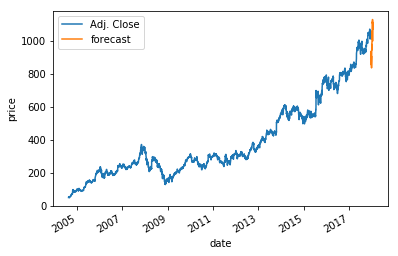

In [31]:
df["Adj. Close"].plot()
df["forecast"].plot()
plt.xlabel("date")
plt.ylabel("price")
plt.legend(loc=2)
plt.show()

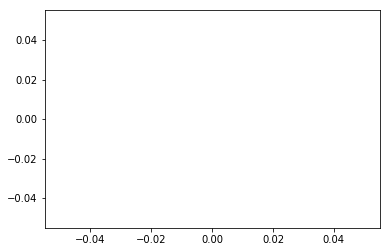

In [32]:
plt.scatter(df["Adj. Close"],df["forecast"])